# Rgresión con ARboles de decisión y SVR

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")

In [4]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
x = dataset.iloc[:,1].values 

In [6]:
x 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
y = dataset.iloc[:,2].values

In [8]:
y 

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

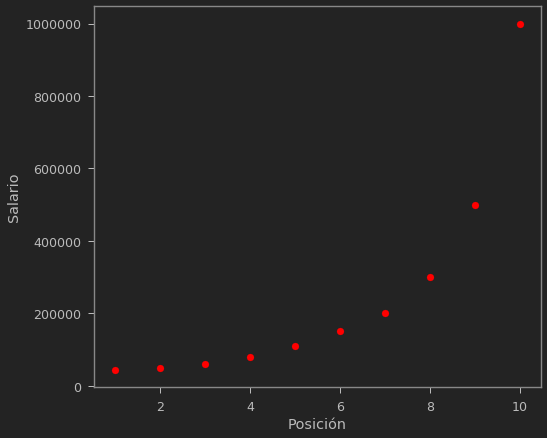

In [11]:
plt.scatter(x,y,c="red")
plt.xlabel("Posición")
plt.ylabel("Salario")
plt.show()

In [22]:
from sklearn.svm import SVR

In [37]:
svr = SVR(kernel="poly", degree=4, tol=0.5)

In [38]:
svr.fit(x.reshape(-1,1),y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.5, verbose=False)

In [39]:
dominio = np.linspace(1,11,1000)

In [40]:
pred_svr = svr.predict(dominio.reshape(-1,1))

In [41]:
pred_svr

array([125158.49042316, 125158.69551377, 125158.90679372, 125159.1243863 ,
       125159.34841602, 125159.5790086 , 125159.81629097, 125160.06039128,
       125160.31143891, 125160.56956443, 125160.83489965, 125161.10757759,
       125161.38773246, 125161.67549973, 125161.97101605, 125162.2744193 ,
       125162.58584858, 125162.9054442 , 125163.23334769, 125163.56970178,
       125163.91465044, 125164.26833883, 125164.63091336, 125165.00252163,
       125165.38331245, 125165.77343587, 125166.17304314, 125166.58228672,
       125167.00132031, 125167.43029881, 125167.86937832, 125168.31871619,
       125168.77847097, 125169.24880241, 125169.7298715 , 125170.22184043,
       125170.72487263, 125171.2391327 , 125171.76478651, 125172.3020011 ,
       125172.85094476, 125173.41178697, 125173.98469845, 125174.56985112,
       125175.1674181 , 125175.77757377, 125176.40049369, 125177.03635465,
       125177.68533465, 125178.3476129 , 125179.02336985, 125179.71278714,
       125180.41604765, 1

In [42]:
svr.score(x.reshape(-1,1), y )

-0.045494947630015714

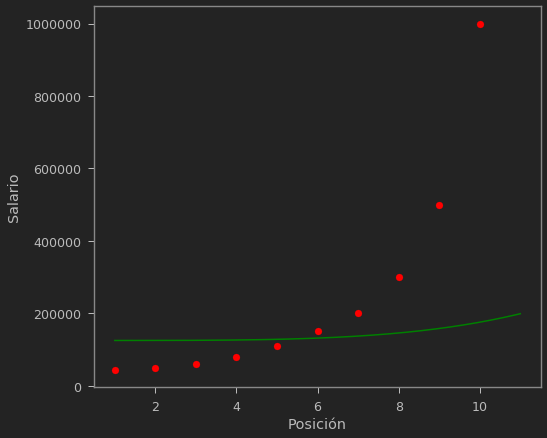

In [43]:
plt.scatter(x,y,c="red")
plt.plot(dominio,pred_svr, c="green")
plt.xlabel("Posición")
plt.ylabel("Salario")
plt.show()

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtr = DecisionTreeRegressor()

In [46]:
dtr.fit(x.reshape(-1,1),y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
dtr.score(x.reshape(-1,1),y)

1.0

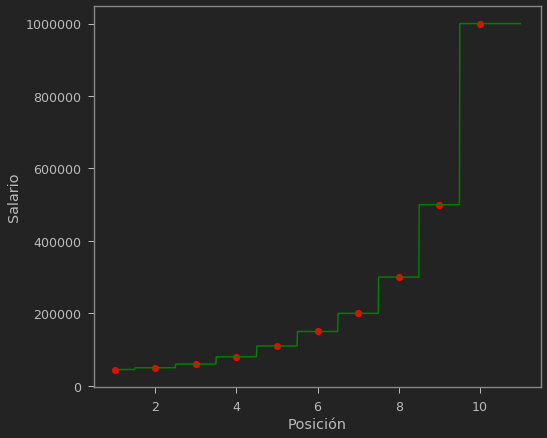

In [49]:
plt.scatter(x,y,c="red")
plt.plot(dominio,dtr.predict(dominio.reshape(-1,1)), c="green")
plt.xlabel("Posición")
plt.ylabel("Salario")
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler


In [60]:
ss = StandardScaler()

In [61]:
ss.fit(y.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
y_std = ss.transform(y.reshape(-1,1))

In [63]:
y_std

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

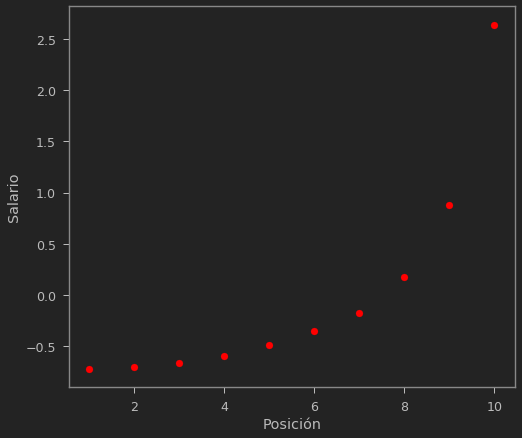

In [64]:
plt.scatter(x,y_std,c="red")
plt.xlabel("Posición")
plt.ylabel("Salario")
plt.show()

In [65]:
svr_2 = SVR(kernel="poly", degree=6)

In [67]:
svr_2.fit(x.reshape(-1,1), y_std.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=6, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [69]:
svr_2.score(x.reshape(-1,1), y_std.ravel())

0.9907725075392586

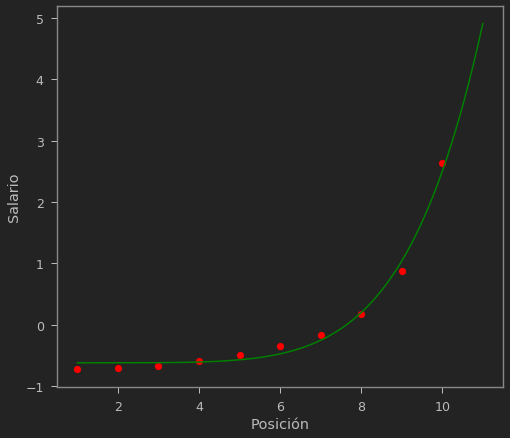

In [71]:
plt.scatter(x,y_std,c="red")
plt.plot(dominio,svr_2.predict(dominio.reshape(-1,1)), c="green")
plt.xlabel("Posición")
plt.ylabel("Salario")
plt.show()

In [73]:
pred_svr_2 = svr_2.predict(dominio.reshape(-1,1))

In [74]:
pred_svr_2

array([-6.20042457e-01, -6.20042265e-01, -6.20042063e-01, -6.20041851e-01,
       -6.20041628e-01, -6.20041394e-01, -6.20041149e-01, -6.20040892e-01,
       -6.20040623e-01, -6.20040341e-01, -6.20040046e-01, -6.20039737e-01,
       -6.20039414e-01, -6.20039076e-01, -6.20038722e-01, -6.20038353e-01,
       -6.20037967e-01, -6.20037565e-01, -6.20037145e-01, -6.20036706e-01,
       -6.20036249e-01, -6.20035772e-01, -6.20035275e-01, -6.20034758e-01,
       -6.20034218e-01, -6.20033657e-01, -6.20033073e-01, -6.20032465e-01,
       -6.20031833e-01, -6.20031175e-01, -6.20030491e-01, -6.20029781e-01,
       -6.20029043e-01, -6.20028276e-01, -6.20027480e-01, -6.20026654e-01,
       -6.20025797e-01, -6.20024907e-01, -6.20023984e-01, -6.20023027e-01,
       -6.20022036e-01, -6.20021008e-01, -6.20019943e-01, -6.20018839e-01,
       -6.20017697e-01, -6.20016514e-01, -6.20015289e-01, -6.20014022e-01,
       -6.20012711e-01, -6.20011355e-01, -6.20009953e-01, -6.20008503e-01,
       -6.20007004e-01, -

In [75]:
ss.inverse_transform(pred_svr_2.reshape(-1,1))

array([[  73401.11963133],
       [  73401.17422555],
       [  73401.23159321],
       [  73401.29184591],
       [  73401.35509856],
       [  73401.42146949],
       [  73401.49108049],
       [  73401.56405687],
       [  73401.64052755],
       [  73401.72062514],
       [  73401.80448595],
       [  73401.89225012],
       [  73401.98406167],
       [  73402.08006856],
       [  73402.18042278],
       [  73402.2852804 ],
       [  73402.39480166],
       [  73402.50915104],
       [  73402.62849733],
       [  73402.75301373],
       [  73402.88287786],
       [  73403.01827192],
       [  73403.1593827 ],
       [  73403.3064017 ],
       [  73403.45952517],
       [  73403.61895424],
       [  73403.78489493],
       [  73403.95755831],
       [  73404.1371605 ],
       [  73404.32392283],
       [  73404.51807185],
       [  73404.71983946],
       [  73404.92946297],
       [  73405.1471852 ],
       [  73405.37325456],
       [  73405.6079251 ],
       [  73405.85145667],
 

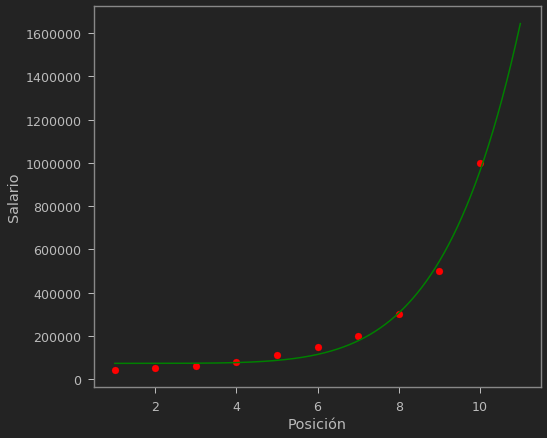

In [77]:
plt.scatter(x,y,c="red")
plt.plot(dominio,ss.inverse_transform(pred_svr_2.reshape(-1,1)).ravel(), c="green")
plt.xlabel("Posición")
plt.ylabel("Salario")
plt.show()